### Steps involve in the project 

create a problem statement

identify the data you want to analyze

Explore and clean the data

Analyze the data to get useful insights

present the data in terms of reports or dashboards using visualization.

## Business Problem

In recent years , City Hotel and Resort hotelhave seen high cancellation rates. Each hotel is now dealing with a number of issues as a resulty , including fewer revenue and less than ideal hotel room use.Consequently lowering cancellation rates is both hotels primary goal in order to incerase their effciencyin gathering revenue, and for us to offer thorough business advice to adress the problem


the analysis of hotel booking cancellations as wellas other factors that have no bearing on their business amd yearly revenue generation are the main topics of this report

## Assumptions 

1. No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used 

2. The information is still current and can be used to analyze a hotel possible plans in an efficient manner 

3. There are no unanticipated negatives to the hotel employing any advised technique

4. The hotel are not currently using any of the suggested solutions

5. The biggest factor affecting the effectiveness of earning income is booking cancellation.

6. cancellation result in vacant rooms for the booked length of the time.

7. clients makes hotel reservations the same year they make cancellations.

## Research Questions

1.What are the variables that affect hotel reservation cancellations ?

2.How can we make hotel reservations cancellations better?

3.How hotels will be assisted in making pricing and promotional decisions?

## Hypothesis

1. More cancellations occur when the price is higher.

2. When there is the longest waiting list, customers tend to cancel more frequently.

3. The majority of clients are coming from offline travel agents to make their reservation.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
df = pd.read_csv("hotel_bookings 2.csv")


In [4]:
df.shape   ## There are 119390 rows and 32 columns in this dataset 

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### changing the reservation_status_date column from object to datetime function

In [6]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('---'*50)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 

## Exploratory Data Analysis - EDA & Data Cleaning

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### So there are Null Values in the dataset

In [14]:
df.drop(['company','agent'],axis=1,inplace=True)  ## droping the columns having null values

In [15]:
df.dropna(inplace=True) ### droping the null values

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
df = df[df['adr']<5000]

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


In [19]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


## Data Analysis and Visualizations

In [20]:
canceled_perc = df['is_canceled'].value_counts(normalize=True)

In [21]:
df['is_canceled'].value_counts()

0    74745
1    44152
Name: is_canceled, dtype: int64

In [22]:
canceled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

### 62.8% resertvation are not cancled and 38% are canceled


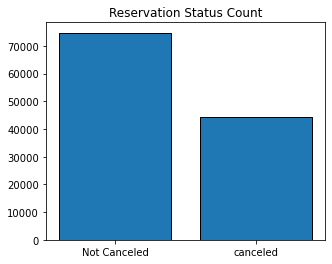

In [23]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled','canceled'],df['is_canceled'].value_counts(),edgecolor='k')
plt.show()

### The accompanying bar graph shows the percentage of reservation that are cancled and those that are not . It is obvious that there are still a significant number of reservation that have not been canceled. There are still 37% of clients who canceled their reservation which has a significant impact on the hotels earnings

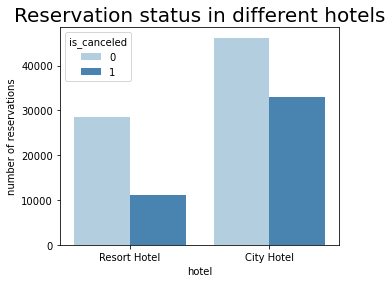

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'hotel',hue='is_canceled',data=df,palette = 'Blues')
plt.title('Reservation status in different hotels',size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.show()

### in comparision to resort hotels, city hotels have more bookings . its possible that resort hotels are more expensive than those in cities

In [25]:
Resort_Hotel = df[df["hotel"]== 'Resort Hotel']
Resort_Hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [26]:
city_Hotel = df[df["hotel"]== 'City Hotel']
city_Hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [27]:
Resort_Hotel = Resort_Hotel.groupby('reservation_status_date')[['adr']].mean()
city_Hotel = city_Hotel.groupby('reservation_status_date')[['adr']].mean()

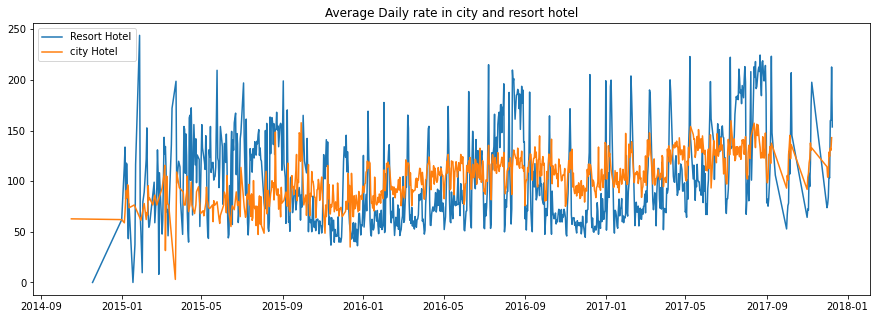

In [35]:
plt.figure(figsize=(15,5))
plt.title('Average Daily rate in city and resort hotel')
plt.plot(Resort_Hotel.index,Resort_Hotel['adr'],label='Resort Hotel')
plt.plot(city_Hotel.index,city_Hotel['adr'],label='city Hotel')
plt.legend(fontsize=10)
plt.show()

### This line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days it is even less. weekends and holidays may see a rise in resort hotel rates

<Figure size 1152x576 with 0 Axes>

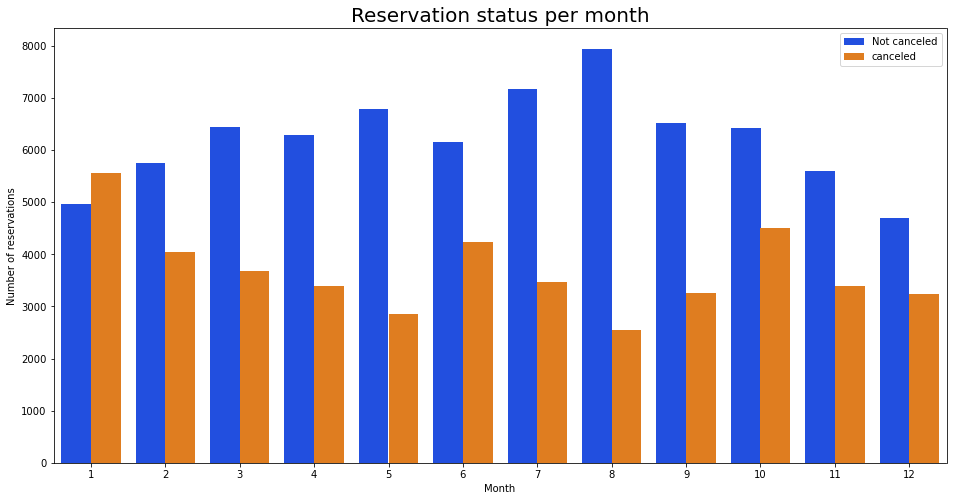

In [42]:
df['month']= df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x='month',hue = 'is_canceled',data=df,palette='bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month',size=20)
plt.xlabel('Month')
plt.ylabel('Number of reservations')
plt.legend(['Not canceled','canceled'])
plt.show()

### we haved developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. as can be seen , both the number of confirmed reservation and the numberof canceled reservations are largest in the month of August where as january is the month with the most canmceled reservations

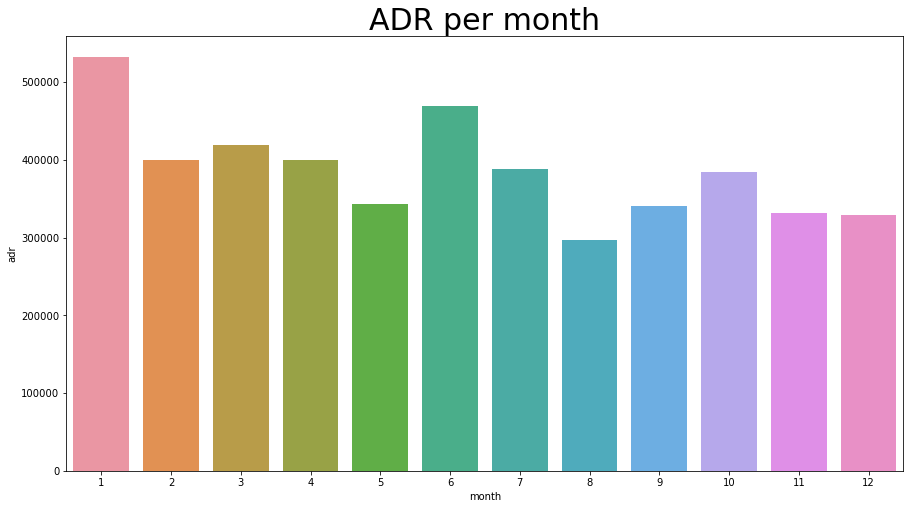

In [43]:
plt.figure(figsize=(15,8))
plt.title('ADR per month',fontsize=30)
sns.barplot('month','adr',data=df[df['is_canceled']== 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

### This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore the cost of the accommodation is solely responsible for the cancellation.



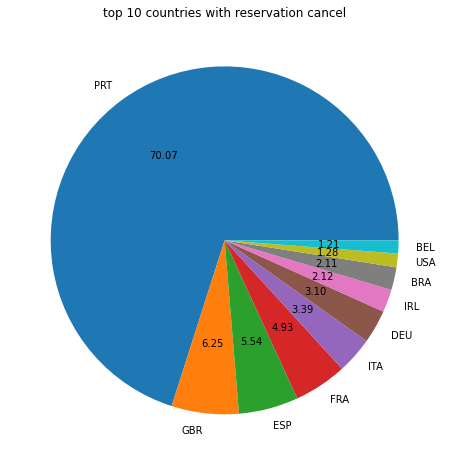

In [44]:
canceled_data = df[df['is_canceled']==1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('top 10 countries with reservation cancel')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

### in this pie chart we can see that portugal has the highest numbers of cancelations

In [45]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [46]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [47]:
canceled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

### so guest are coming from direct or groups , online or offline travel Agents? 
### Around 46% of the clients come from online travel agencies, where as 27% come from groups. only 4% of clients book hotels directly by visiting them and making reservations.

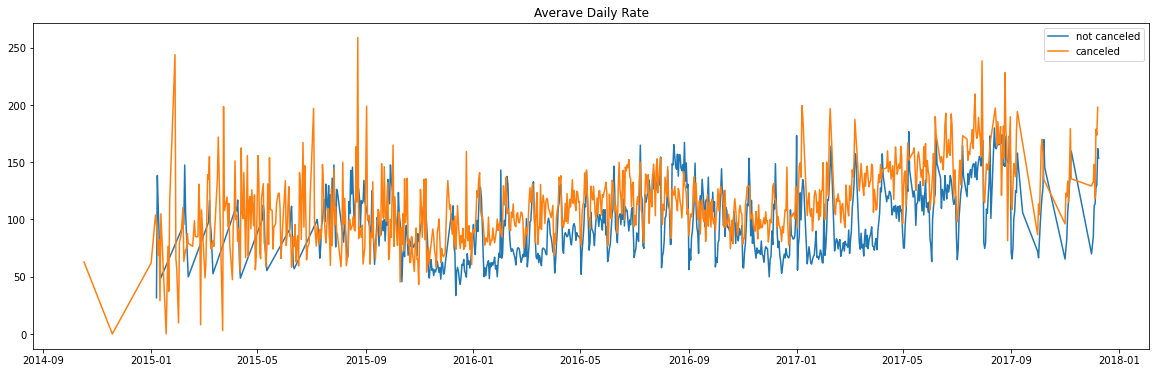

In [50]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date',inplace=True)

not_canceled_data = df[df['is_canceled']== 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Averave Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label='canceled')

plt.legend()
plt.show()

### As seen in the graph reservations are canceled when the average daily rate is higher than when it is not canceled. it clearly proves all the above analysis, that the higher price leades to higher cancellation.